<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3.1ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

load korpus

In [48]:
korpus1a = '/content/drive/MyDrive/korpus1dataisear(preputama).csv'
korpus1b = '/content/drive/MyDrive/korpus1dataisear(preptambah).csv'
korpus2a = '/content/drive/MyDrive/korpus2(preputama).csv'
korpus2b = '/content/drive/MyDrive/korpus2(preptambah).csv'
df = pd.read_csv(korpus1b)

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'disgust'].sample(frac=1).index)

In [49]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

pilih model

In [50]:
pakai_model=2

load model

In [20]:
from gensim.models import word2vec
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

In [51]:
if pakai_model == 1:#load model word2vec
  model = gensim.models.word2vec.Word2Vec.load('/content/drive/MyDrive/korpus1+blog(preptambah).w2v')

elif pakai_model == 2:#load model glove
  model=Glove.load('/content/drive/MyDrive/korpus1+blog(preptambah).glove')

ft

In [7]:
import gensim
import multiprocessing
from gensim.models import FastText

In [8]:
model=gensim.models.FastText.load('/content/drive/MyDrive/korpus1+blog(preptambah).ft')

In [9]:
model.wv.vectors.shape

(908097, 100)

In [10]:
model.wv["yes"]

array([-1.6030304e-01,  7.4624933e-02, -6.6067569e-02, -1.9056515e-01,
       -1.0811662e-01, -1.5898502e-01,  2.9597646e-01, -4.9413821e-01,
        2.1252683e-01, -2.1294379e-01,  3.7743473e-01,  1.4332914e-01,
        1.4581354e-01, -5.7055080e-01,  2.0915738e-01,  2.4308136e-01,
       -1.4109777e-01, -4.7160303e-03, -2.7090126e-01, -3.0724242e-01,
        1.4733352e-02, -3.5831356e-01,  9.4068901e-06,  3.6258164e-01,
       -1.8123712e-02, -9.6960090e-02,  9.9078618e-02, -5.3254449e-01,
       -2.8545660e-01,  7.3417984e-02, -2.3300426e-01,  1.8089540e-01,
        6.9177553e-02,  5.4255271e-01, -6.1472241e-02, -1.8647979e-01,
        4.5107561e-01, -1.5016389e-01,  5.9499055e-01, -2.1075526e-02,
       -1.6485551e-01,  1.6829541e-02, -4.1091588e-01, -2.7934644e-02,
       -3.9017105e-01, -6.2679189e-01, -1.1576921e-02, -5.5312060e-02,
        3.4623152e-01, -3.5690212e-01, -8.1305422e-02, -6.4371251e-02,
       -1.6630973e-01,  3.2814007e-02,  3.3163077e-01,  2.6075128e-01,
      

cek model

In [8]:
if pakai_model == 1:
  print(model.wv.vectors.shape)
elif pakai_model == 2:
  print(model.word_vectors.shape)

(1048781, 100)


In [9]:
if pakai_model == 1:
  print(model.wv["yes"])
elif pakai_model == 2:
  print(model.word_vectors[model.dictionary['yes']])

[-0.41766635 -1.0635376  -0.262614   -0.37742534 -0.02194191 -0.24074964
  0.06978427  0.14756636  0.07836632  0.07994981 -0.25545216 -0.15752845
  0.1253848   0.6856378  -0.4855982   0.0141424  -0.15955311  0.43400466
  0.06615852 -0.0728581   0.06500106 -0.08636379 -0.3738369  -0.08272023
 -0.7375253  -0.18729226  0.05764452 -0.6034527   0.17844945  0.07189113
  0.3069991  -0.1802014   0.31652895 -0.03516424 -0.26825622 -0.5529636
 -0.21589138 -0.1688759  -0.16908735 -0.11077529  0.12718993 -0.01559907
 -0.3111336  -0.23536545  0.49829903 -0.15480597 -0.40604818 -0.02421476
  0.12848781  0.07275131  0.46799886  0.17326859  0.1686279   0.57389164
 -0.02625341  0.16042438 -0.23636344  0.07219117 -0.1310839   0.3206812
  0.00275551 -0.11233038 -0.11548679 -0.07578912 -0.19595829  0.06155459
  0.06004046  0.5040633  -0.14584821 -0.17753683  0.49384066  0.22198173
 -0.15817659  0.23407578  0.37035337 -0.48835734  0.3584498   0.6765012
 -0.05737595  0.42673612 -0.2552739  -0.521087   -0.23

ambil conntoh model wor embedding

In [11]:
import array
count=0
simpanang=[]
simpankat=[]
jml=24
if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.wv[word])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      simpanang.append(model.word_vectors[model.dictionary[word]])
      simpankat.append(word)
      if count<jml:
        count+=1
      else :
        break
    if count<jml:
      count+=1
    else :
      break


In [ ]:
dfang=pd.DataFrame(simpanang)
dfkat=pd.DataFrame(simpankat)
result = pd.concat([dfkat, dfang], axis=1)
result.shape

(24, 101)

In [ ]:
result.to_excel("preptambah,glove.xlsx")

sum base ekstraksi fitur

In [ ]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
hitungbiasa=0
hitungpre=0

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    # temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    # temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

average base ekstraksi fitur

In [52]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)

if pakai_model == 1:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.wv[word])
    temp=temp/len(senten)
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      temp=np.add(temp,model.word_vectors[model.dictionary[word]])
    temp=temp/len(senten)
    ekstrak.append(temp)

has_vec=ekstrak

In [53]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


In [25]:
y

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: emosi, Length: 7516, dtype: object

ambil contoh 

In [ ]:
korpus1='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus1dataISEAR.csv'
df1 = pd.read_csv(korpus1)

In [ ]:
dfvector=pd.DataFrame(has_vec)
dfkalimat=pd.DataFrame(df1.dokumen)
result = pd.concat([dfkalimat, dfvector], axis=1)
result.shape

(7516, 101)

In [ ]:
result.to_excel("pos eksfit,glove,tambah.xlsx")

klasifikasi svm

In [54]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [55]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

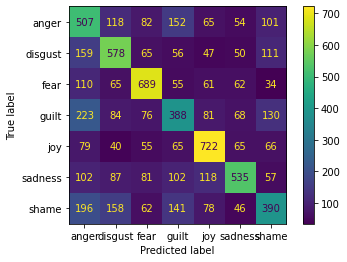

0.506785524215008
(0.5097090320904185, 0.5059606166704429, 0.505316209076125, None)


In [56]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr', C=17.0)
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

In [57]:
y_pred[:10]

array(['joy', 'disgust', 'anger', 'sadness', 'shame', 'guilt', 'guilt',
       'sadness', 'fear', 'fear'], dtype=object)

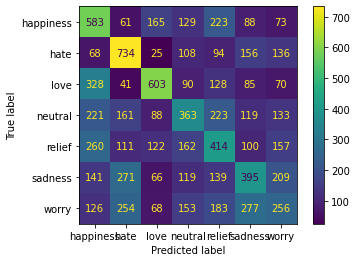

0.36081474296799226
(0.3580829056740232, 0.36055181581190343, 0.35620886810733376, None)


In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

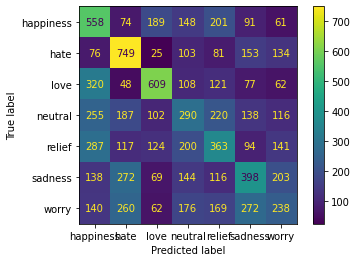

0.34540359952581096
(0.33967824084291826, 0.34500963056815764, 0.33876363950124333, None)


In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

In [26]:
y

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: emosi, Length: 7516, dtype: object

In [25]:
y_test

4019    guilt
6518    anger
1547    anger
7466    guilt
72        joy
        ...  
3688    guilt
5660      joy
3756     fear
191      fear
3732    shame
Name: emosi, Length: 752, dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



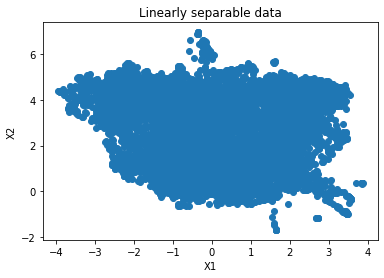

In [26]:
# Imports
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix

# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1.5
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
# X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)
X_train, X_test, y_train, y_test = train_test_split(tes, y, test_size=0.1, random_state=blobs_random_seed)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=blobs_random_seed)

# Save and load temporarily
np.save('./datasv.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./datasv.npy', allow_pickle=True)

# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Initialize SVM classifier
# clf = svm.SVC(kernel='linear')

# # Fit data
# clf = clf.fit(X_train, y_train)

In [27]:
np.shape(X_train)

(6764, 2)

In [28]:
clf = svm.SVC(kernel='poly')

In [29]:
clf = clf.fit(X_train, y_train)

In [44]:
clf.

In [30]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[   5   10   12 ... 6749 6754 6755]


In [31]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)

[967 939 789 944 842 881 953]


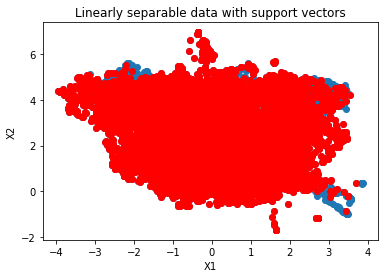

In [32]:
# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [20]:
import sklearn.datasets
!pip install umap-learn[plot]

import plotly.express as px

     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 10.2 MB/s 
     |████████████████████████████████| 18.2 MB 28.6 MB/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 
     |████████████████████████████████| 136 kB 49.7 MB/s 
     |████████████████████████████████| 837 kB 40.7 MB/s 
     |████████████████████████████████| 830 kB 45.6 MB/s 
     |████████████████████████████████| 822 kB 35.0 MB/s 
     |████████████████████████████████| 802 kB 42.2 MB/s 
     |████████████████████████████████| 802 kB 53.0 MB/s 
     |████████████████████████████████| 793 kB 39.9 MB/s 
     |████████████████████████████████| 793 kB 47.6 MB/s 
     |████████████████████████████████| 791 kB 53.3 MB/s 
     |████████████████████████████████| 786 kB 48.3 MB/s 
     |████████████████████████████████| 779 kB 41.9 MB/s 
     |████████████████████████████████| 778 kB 44.6 MB/s 
     |████████████████████████████████| 776 kB 49.9 MB/s 
     |███████████

In [21]:
from umap import UMAP

tes = UMAP().fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [22]:
vis=pd.DataFrame(tes, columns=["Umap1","Umap2"])
vis["dokumen"]=y

In [23]:
vis

,Umap1,Umap2,dokumen
0,-0.778360,2.061753,joy
1,-1.937003,0.915511,fear
2,-0.897628,1.226056,anger
3,-2.281384,2.484206,sadness
4,-1.470258,2.358405,disgust
...,...,...,...
7511,-1.608933,3.521458,shame
7512,-1.916906,3.018408,shame
7513,2.134854,4.279351,fear
7514,-2.234958,3.169561,guilt


In [24]:
fig= px.scatter(vis,x="Umap1",y="Umap2",text="dokumen")
fig.update_traces(textposition='top center')
fig.update_layout(height=800,title_text='Reduce Word2Vec Visuallization')
fig.show()